# In this project, we are predicting the Salary for a certain position i.e. designation in an organisation.
## The scenario goes like this:
## At the end of an interview, a candidate has mentioned his salary expectation as atleast 160K.
## When asked to justify the salary, he replies that 160K is what he was being paid in his previous organisation and he wouldn't want to go below that.

## We need to find out whether the candidate is being true or bluffing.
## The dataset was created by sourcing data from online websites which collect salaries data of various organisations. eg. Glassdoor.

## The candidate's profile mentions that he was a Region Manager for 2 years.
## As per the dataset, this position is level 6.
## Since he has been in this role for 2 years we have to consider some middle ground between level 6 and level 7 to be fair to the candidate.
## Thus, we will predict the salary for level 6.5 and find out whether the candidate is being true or making a bluff.

### Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Importing the Dataset

In [2]:
dataset = pd.read_csv("Position_Salaries.csv")
X = dataset.iloc[:,1:-1].values
Y = dataset.iloc[:,-1].values

In [3]:
dataset

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [4]:
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

In [5]:
Y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000])

In [6]:
# Salary quoted by candidate
y_test = np.array([160000])

## Creating the Linear Regression Model

In [7]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Creating the Polynomial Regression model

In [8]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(X)

In [9]:
lin_reg2 = LinearRegression()
lin_reg2.fit(X_poly,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Visualising the Linear Regression Results

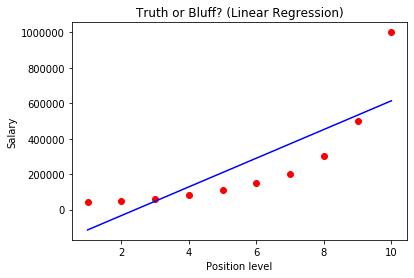

In [10]:
plt.scatter(X,Y, color = "red")
plt.plot(X, lin_reg.predict(X), color="blue")
plt.title('Truth or Bluff? (Linear Regression)')
plt.xlabel("Position level")
plt.ylabel("Salary")
plt.show()

### Visualising the Polynomial Regression results

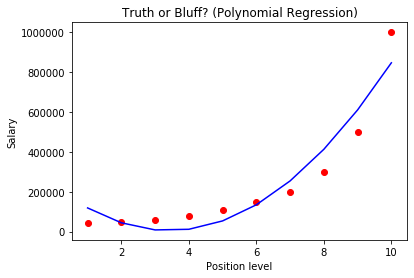

In [11]:
plt.scatter(X, Y, color = "red")
plt.plot(X, lin_reg2.predict(X_poly), color = "blue")
plt.title("Truth or Bluff? (Polynomial Regression)")
plt.xlabel("Position level")
plt.ylabel("Salary")
plt.show()

#### Retraining the Polynomial Regression model with degree=3

In [12]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=3)
X_poly = poly_reg.fit_transform(X)

In [13]:
lin_reg3 = LinearRegression()
lin_reg3.fit(X_poly,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

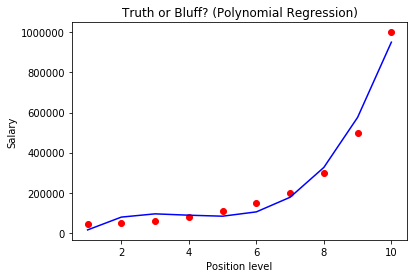

In [14]:
plt.scatter(X,Y, color = "red")
plt.plot(X, lin_reg3.predict(X_poly), color="blue")
plt.title('Truth or Bluff? (Polynomial Regression)')
plt.xlabel("Position level")
plt.ylabel("Salary")
plt.show()

#### Retraining the Polynomial Regression model with degree=4

In [15]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(X)

In [16]:
lin_reg4 = LinearRegression()
lin_reg4.fit(X_poly,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

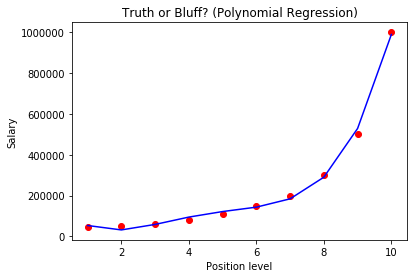

In [17]:
plt.scatter(X,Y, color = "red")
plt.plot(X, lin_reg4.predict(X_poly), color="blue")
plt.title('Truth or Bluff? (Polynomial Regression)')
plt.xlabel("Position level")
plt.ylabel("Salary")
plt.show()

#### You can see that above we have overfitting. But we will get a good prediction.

### Predicting the salary with the Linear Regression model

In [18]:
pred_1 = lin_reg.predict([[6.5]])

In [19]:
pred_1

array([330378.78787879])

### Predicting the salary with the Polynomial Regression model

In [20]:
pred_2 = lin_reg4.predict(poly_reg.fit_transform([[6.5]]))

In [21]:
pred_2

array([158862.4526516])

### Lets measure how much away is our prediction from the value in the dataset

### According to the dataset, level 6.5 should earn something around 150K to 200K

In [22]:

print("Our LR model predicts {}".format(round(pred_1[0],0)))

print("Our PR model predicts {}\n".format(round(pred_2[0],0)))

from sklearn.metrics import mean_squared_error
mse_lr = mean_squared_error(y_test, pred_1)
mse_pr = mean_squared_error(y_test, pred_2)

print("MSE of Linear Regression model is ", mse_lr)
print("MSE of Polynomial Regression model is ", mse_pr)

best_mse = min(mse_lr, mse_pr)

print("Better MSE is", best_mse)

Our LR model predicts 330379.0
Our PR model predicts 158862.0

MSE of Linear Regression model is  29028931359.044983
MSE of Polynomial Regression model is  1294013.9698606017
Better MSE is 1294013.9698606017


## There you go! salary predcited by PR model is super close to the approx. salary for level 6.5 as per the dataset. Also, we can see that MSE of PR model is much smaller than that of LR model.
## Therefore we can conclude that using Polynomial Regression model is the better choice here when comparing to Linear Regression model.

## Thank you..

## As a continuation of this project, I will also add SVR regression prediction results here and see how it compares with the previous 2 models

## SVR

### Feature Scaling

In [23]:
Y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000])

In [24]:
Y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000])

In [25]:
Y = Y.reshape(len(Y),1)

In [26]:
Y

array([[  45000],
       [  50000],
       [  60000],
       [  80000],
       [ 110000],
       [ 150000],
       [ 200000],
       [ 300000],
       [ 500000],
       [1000000]])

In [27]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_Y = StandardScaler()
X = sc_X.fit_transform(X)
Y = sc_Y.fit_transform(Y)

In [28]:
X

array([[-1.5666989 ],
       [-1.21854359],
       [-0.87038828],
       [-0.52223297],
       [-0.17407766],
       [ 0.17407766],
       [ 0.52223297],
       [ 0.87038828],
       [ 1.21854359],
       [ 1.5666989 ]])

In [29]:
Y

array([[-0.72004253],
       [-0.70243757],
       [-0.66722767],
       [-0.59680786],
       [-0.49117815],
       [-0.35033854],
       [-0.17428902],
       [ 0.17781001],
       [ 0.88200808],
       [ 2.64250325]])

### Training the SVR model on the whole dataset

In [30]:
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
regressor.fit(X, Y)

/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

### Predicting a new result

In [31]:
pred_3 = sc_Y.inverse_transform(regressor.predict(sc_X.transform([[6.5]])))

In [32]:
pred_3

array([170370.0204065])

### Visualising the SVR results

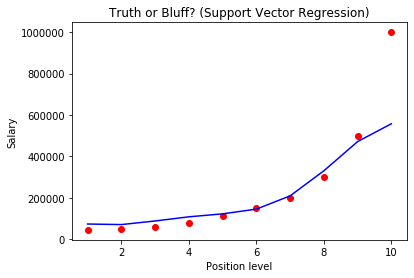

In [33]:
plt.scatter(sc_X.inverse_transform(X), sc_Y.inverse_transform(Y), color = "red")
plt.plot(sc_X.inverse_transform(X), sc_Y.inverse_transform(regressor.predict(X)), color = "blue")
plt.title("Truth or Bluff? (Support Vector Regression)")
plt.xlabel("Position level")
plt.ylabel("Salary")
plt.show()

### Visualising the SVR results (in higher resolution and smoother curve)

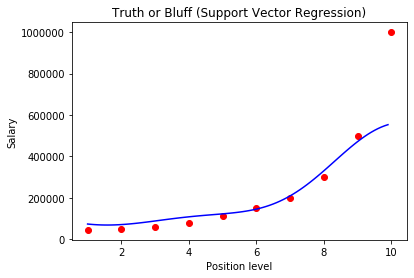

In [34]:
X_grid = np.arange(min(sc_X.inverse_transform(X)), max(sc_X.inverse_transform(X)), 0.1)
X_grid = X_grid.reshape((len(X_grid),1))
plt.scatter(sc_X.inverse_transform(X), sc_Y.inverse_transform(Y), color = "red")
plt.plot(X_grid, sc_Y.inverse_transform(regressor.predict(sc_X.transform(X_grid))), color='blue')
plt.title("Truth or Bluff (Support Vector Regression)")
plt.xlabel("Position level")
plt.ylabel("Salary")
plt.show()

In [35]:
### Mean Squared error
from sklearn.metrics import mean_squared_error
mse_lr = mean_squared_error(y_test, pred_1)
mse_pr = mean_squared_error(y_test, pred_2)
mse_svr = mean_squared_error(y_test, pred_3)

In [36]:
mse_lr

29028931359.044983

In [37]:
mse_pr

1294013.9698606017

In [38]:
mse_svr

107537323.23127532

## The MSE for PR model is the least, followed by SVR model and lastly LR model.
## However note that our PR model was overfitted with a degree of 4.